In [1]:
import sys
print(sys.executable)

C:\Users\srika\AppData\Local\Programs\Python\Python311\python.exe


In [2]:
# Basic libraries for data handling and ML
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Load spam dataset from a public URL
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', names=["label", "message"])

# Preview the data
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Check number of spam vs ham messages
df['label'].value_counts()


label
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
# ham -> 0, spam -> 1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Check updated dataframe
df.head()


,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
# Features and labels
X = df['message']
y = df['label_num']

# Split into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)


In [8]:
# Train using Multinomial Naive Bayes (works well for text)
model = MultinomialNB()
model.fit(X_train_tf, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [9]:
# Predict on test set
y_pred = model.predict(X_test_tf)


In [10]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.972488038277512
Confusion Matrix:
 [[1447    1]
 [  45  179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1448
           1       0.99      0.80      0.89       224

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



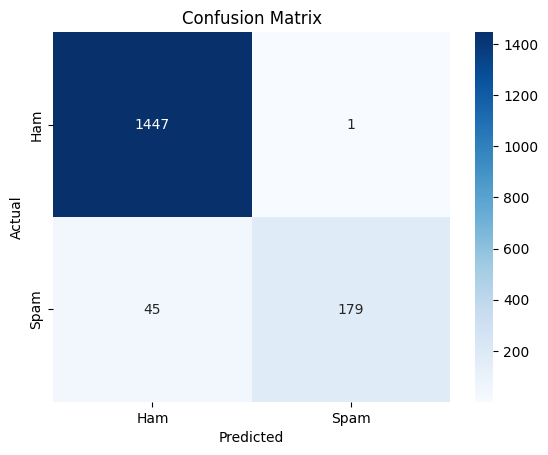

In [11]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
